<a href="https://colab.research.google.com/github/musticevik/ECG-ML/blob/main/yap470_ecg_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiac Disease Prediction from ECG

## Data Preprocessing

In [41]:
import numpy as np
import pandas as pd
import os
from scipy.io import loadmat
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight

## Visualization of Dataset

In [42]:
ecg_limit = 200 # Limit the number of ecg that will be processed

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Klasör işleniyor: /content/drive/MyDrive/g1
Toplam .hea dosya sayısı: 999


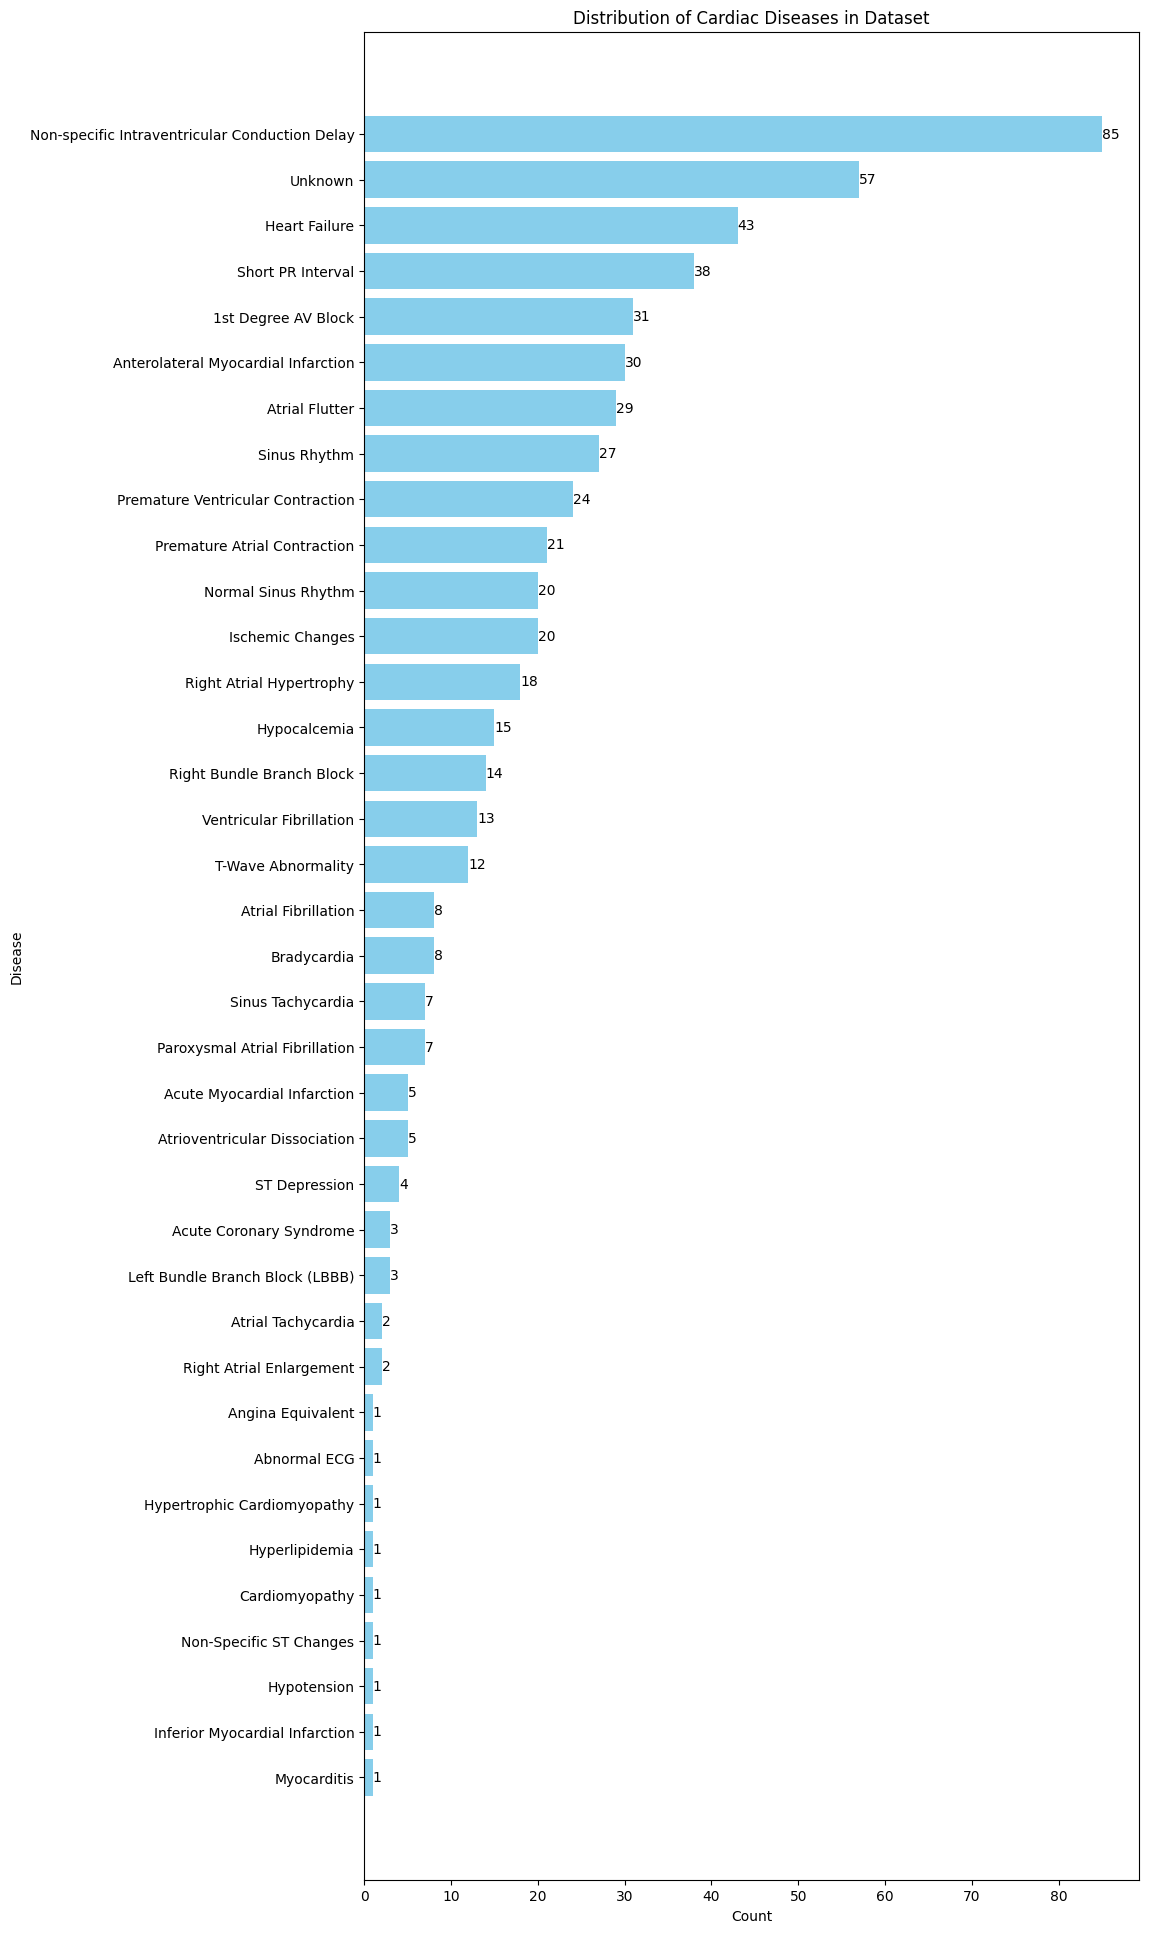

Disease counts:
Ventricular Fibrillation: 13
Unknown: 25
Non-specific Intraventricular Conduction Delay: 85
Heart Failure: 43
Normal Sinus Rhythm: 20
1st Degree AV Block: 31
Short PR Interval: 38
Atrial Flutter: 29
Unknown: 20
Hypocalcemia: 15
Sinus Rhythm: 27
Anterolateral Myocardial Infarction: 30
Sinus Tachycardia: 7
Premature Atrial Contraction: 21
Ischemic Changes: 20
Non-Specific ST Changes: 1
Unknown: 10
Premature Ventricular Contraction: 24
Paroxysmal Atrial Fibrillation: 7
Bradycardia: 8
Right Bundle Branch Block: 14
T-Wave Abnormality: 12
Hypertrophic Cardiomyopathy: 1
Atrial Tachycardia: 2
Acute Myocardial Infarction: 5
Right Atrial Enlargement: 2
Angina Equivalent: 1
Abnormal ECG: 1
Atrial Fibrillation: 8
Atrioventricular Dissociation: 5
Acute Coronary Syndrome: 3
ST Depression: 4
Left Bundle Branch Block (LBBB): 3
Hyperlipidemia: 1
Cardiomyopathy: 1
Right Atrial Hypertrophy: 18
Hypotension: 1
Inferior Myocardial Infarction: 1
Myocarditis: 1
Unknown: 2


In [45]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from google.colab import drive

# SNOMED disease codes
snomed_diseases = {
    "84114007": "Myocardial Infarction",
    "698247007": "Ventricular Ectopic Beats",
    "74390002": "Pericarditis",
    "164895002": "Abnormal T-Wave",
    "164896001": "Non-Specific ST Changes",
    "53741008": "Biphasic T Wave",
    "266249003": "Hyperlipidemia",
    "6374002": "Angina Equivalent",
    "368009": "Cardiac Arrest",
    "204384007": "Heart Murmur",
    "314208002": "Left Ventricular Enlargement",
    "164930006": "Right Atrial Hypertrophy",
    "55930002": "Pulmonary Hypertension",
    "61721007": "Bundle Branch Block",
    "427393009": "Paroxysmal Atrial Fibrillation",
    "75532003": "Cardiomegaly",
    "713422000": "Abnormal ECG",
    "106068003": "Atrial Flutter",
    "251223006": "ST-T Wave Abnormality",
    "10370003": "Heart Disease",
    "713426002": "Acute Coronary Syndrome",
    "81898007": "Electrocardiogram Abnormal",
    "426761007": "Non-Specific ST-T Abnormality",
    "89792004": "Cardiomyopathy",
    "251170000": "Brugada Syndrome",
    "50799005": "Aortic Stenosis",
    "251198002": "Complete AV Block",
    "427172004": "Sinus Arrest",
    "6180003": "Ventricular Arrhythmia",
    "57054005": "Pulmonary Embolism",
    "251205003": "Right Ventricular Hypertrophy",
    "13640000": "Left Axis Deviation",
    "29320008": "Right Axis Deviation",
    "49578007": "Congestive Heart Failure",
    "426995002": "Ectopic Atrial Rhythm",
    "5609005": "Supraventricular Tachycardia",
    "27885002": "Cardiovascular Disease",
    "17366009": "Left Atrial Abnormality",
    "195042002": "Myocarditis",
    "233897008": "Left Bundle Branch Block",
    "233892002": "Right Bundle Branch Block",
    "67751000119106": "Hypokalemia",
    "195060002": "Hypertrophic Cardiomyopathy",
    "425856008": "Atrial Tachycardia",
    "446358003": "Sinus Tachycardia",
    "251166008": "High Lateral MI",
    "251187003": "Incomplete RBBB",
    "63593006": "Cor Pulmonale",
    "251164006": "Bifascicular Block",
    "54016002": "Arrhythmia",
    "426183003": "Atrioventricular Block",
    "54329005": "Pulmonary Edema",
    "445211001": "Irregular Heart Rhythm",
    "426664006": "Atrioventricular Dissociation",
    "251211000": "Wolff-Parkinson-White Pattern",
    "67741000119109": "Hypocalcemia",
    "426648003": "Interventricular Conduction Delay",
    "418818005": "Mitral Valve Prolapse",
    "164942001": "ST Elevation",
    "61277005": "Pericardial Effusion",
    "65778007": "Ventricular Septal Defect",
    "77867006": "Tricuspid Regurgitation",
    "164947007": "Hypokalemia",
    "164865005": "Atrial Fibrillation",
    "426783006": "Right Bundle Branch Block",
    "164890007": "Atrial Fibrillation",
    "164889003": "Normal Sinus Rhythm",
    "282825002": "Angina Pectoris",
    "427084000": "Premature Atrial Contraction",
    "426177001": "Sinus Rhythm",
    "55827005": "Left Ventricular Hypertrophy",
    "164917005": "Premature Ventricular Contraction",
    "164934002": "Non-specific Intraventricular Conduction Delay",
    "251146004": "Bradycardia",
    "713427006": "Anterior Myocardial Infarction",
    "251199005": "Left Atrial Enlargement",
    "429622005": "Inferior Myocardial Infarction",
    "428750005": "Heart Failure",
    "164931005": "Right Atrial Enlargement",
    "59931005": "1st Degree AV Block",
    "698252002": "ST Depression",
    "59118001": "Sinus Tachycardia",
    "270492004": "Ventricular Fibrillation",
    "39732003": "Ischemic Changes",
    "284470004": "Anterolateral Myocardial Infarction",
    "445118002": "Hypertrophic Cardiomyopathy",
    "47665007": "Bifascicular Block",
    "233917008": "Atrioventricular Dissociation",
    "17338001": "T-Wave Abnormality",
    "164909002": "Atrial Tachycardia",
    "164873001": "Atrial Flutter",
    "164937009": "Hyperkalemia",
    "111975006": "Short PR Interval",
    "428417006": "Acute Myocardial Infarction",
    "164912004": "Sinus Bradycardia",
    "251180001": "Ventricular Tachycardia",
    "426627000": "Complete Heart Block",
    "111288001": "Obesity",
    "446813000": "Pre-excitation syndrome",
    "251173003": "Long QT Syndrome",
    "195101003": "Hypotension",
    "251120003": "Left Bundle Branch Block (LBBB)"
}

drive.mount('/content/drive')

# Different dataset paths
data_path = "/content/drive/MyDrive/g1"
diseases = []
index = 0 # Track processed ecg count

print(f"Klasör işleniyor: {data_path}")
files = os.listdir(data_path)
hea_files = [f for f in files if f.endswith('.hea')]
print(f"Toplam .hea dosya sayısı: {len(hea_files)}")

for filename in os.listdir(data_path):
    if index == ecg_limit: # If reached ecg limit, break
        break
    if filename.endswith(".hea"):
        header_path = os.path.join(data_path, filename)
        with open(header_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                if line.startswith("# Dx"):
                    dx_codes = line.split(":")[1].strip().split(",")
                    diseases.extend(dx_codes)
        index += 1


disease_counts = Counter(diseases)


# Turn SNOMED disease codes into disease names
disease_names = {}
for code, count in disease_counts.items():
    name = snomed_diseases.get(code, "Unknown")
    if name in disease_names:
        disease_names[name] += count
    else:
        disease_names[name] = count

# Visualizing dataset
df = pd.DataFrame(disease_names.items(), columns=["Disease", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 24))
bars = plt.barh(df["Disease"], df["Count"], color="skyblue")

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
             va='center', ha='left', color='black')

plt.xlabel("Count")
plt.ylabel("Disease")
plt.title("Distribution of Cardiac Diseases in Dataset")
plt.gca().invert_yaxis()
plt.show()


print("Disease counts:")
for disease, count in disease_counts.items():
    name = snomed_diseases.get(disease, "Unknown")
    print(f"{name}: {count}")

### 1. Filtering ECG to Remove Noise

In [46]:
def filter_ecg(ecg_data, low_cutoff, high_cutoff, fs):
    def butter_bandpass(lowcut, highcut, fs, order=1):
        nyquist = 0.5 * fs
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
        return b, a

    def apply_bandpass_filter(ecg_data, lowcut, highcut, fs, order=1):
        b, a = butter_bandpass(lowcut, highcut, fs, order)
        ecg_filtered = filtfilt(b, a, ecg_data)  # Using filtfilt to avoid phase distortion
        return ecg_filtered

    ecg_filtered = apply_bandpass_filter(ecg_data, low_cutoff, high_cutoff, fs)

    return ecg_filtered

#### ECG Filtering Visualization

In [47]:
def get_sample_frequency(header_path):
      with open(header_path, "r") as file:
        line = file.readline()
        return line.split(" ")[2] # Sample frequency value

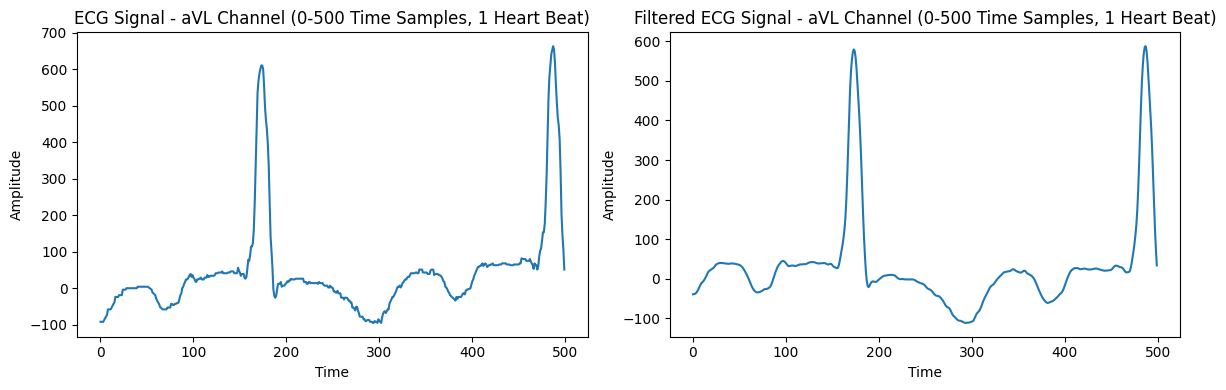

In [48]:
temp_ecg = []
fs = 1000 # Common sample frequency value
for filename in os.listdir(data_path):
        if filename.endswith(".mat"):
            mat_path = os.path.join(data_path,filename)
            mat_data = loadmat(mat_path)
            temp_ecg = mat_data['val']
            header_path = mat_path.replace(".mat", ".hea")
            fs = int(get_sample_frequency(header_path))

temp_filtered_ecg = filter_ecg(temp_ecg, 0.5, 50, fs) # Sample frequency: 1000, lowcut = 0.5, highcut = 50

fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].plot(temp_ecg[4,0:fs]) # aVL channel is the 5th (4th index) channel of 12-Channel-ECG
axs[0].set_title(f"ECG Signal - aVL Channel (0-{fs} Time Samples, 1 Heart Beat)")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")

axs[1].plot(temp_filtered_ecg[4,0:fs])
axs[1].set_title(f"Filtered ECG Signal - aVL Channel (0-{fs} Time Samples, 1 Heart Beat)")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

### 2. Feature Extraction

#### Get Patient's Age and Sex Info from Header File

In [49]:
def get_patient_info(header_path):
    age, sex = None, None
    with open(header_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("# Age"):
                age = line.split(":")[1].strip()
            elif line.startswith("# Sex"):
                sex = line.split(":")[1].strip()

    # Default values for missing data
    if age is None:
        age = -1
    if sex is None:
        sex = 'unknown'

    sex = 0 if sex.lower() == 'male' else 1 # Convert sex string to a numeric value

    try:
        age = float(age)  # Ensure that age is a numeric value
    except ValueError:
        age = 0

    return age, sex

#### Extract and Combine Features

In [50]:
def extract_features(ecg_data, header_path, fs):
    features = []
    for i in range(ecg_data.shape[0]):
        lead_data = ecg_data[i,:]
        peaks, _ = find_peaks(lead_data, height=0.5, distance=fs/2) # Calculate peaks
        rr_intervals = np.diff(peaks) / fs

        heart_rate = len(peaks) * (60 / ((len(lead_data)) / fs)) # BPM
        avg_rr_interval = np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
        std_rr_interval = np.std(rr_intervals) if len(rr_intervals) > 0 else 0

        age, sex = get_patient_info(header_path)

        features.append([heart_rate, avg_rr_interval, std_rr_interval, age, sex])

    return np.array(features)

### 3. Creating Dataset

#### Extract Disease Code from Header File

In [51]:
def extract_disease_code(header_path):
    with open(header_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("# Dx"): # Dx indicates cardiac disease number
                return line.split(":")[1].strip().split(",")

#### Preparing Dataset

In [52]:
def prepare_dataset(data_path):
    data = []
    labels = []
    index = 0 # Track processed ecg count
    for filename in os.listdir(data_path):
        if filename.endswith(".mat"):
            mat_path = os.path.join(data_path,filename)
            mat_data = loadmat(mat_path)
            ecg_data = mat_data['val']

            # Label Extracting
            header_path = mat_path.replace(".mat", ".hea")
            label = extract_disease_code(header_path)

            fs = int(get_sample_frequency(header_path)) # Get sample frequency

            # Filtering ECG Signals
            ecg_filtered = filter_ecg(ecg_data, 0.5, 50, fs)

            # Feature Extracting
            features = extract_features(ecg_filtered, header_path, fs)

            # Assemble Dataset
            for feature in features:
                data.append(feature)
                labels.append(label)

            print(f"\r{index} / {ecg_limit}",end="")
            index = index + 1
            if index == ecg_limit: # If ecg limit is reached, break
                break

    # Create DataFrame
    df = pd.DataFrame(data, columns=["heart_rate", "avg_rr_interval", "std_rr_interval", "age", "sex"])
    df['label'] = labels

    # Convert age and sex values into numeric
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['sex'] = pd.to_numeric(df['sex'], errors='coerce')

    # Fill NaN values
    df['age'] = df['age'].fillna(df['age'].mean())  # Fill with mean
    df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

    df = df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle

    return df

### 4. Load Data

In [53]:
data_paths = [
    "/content/drive/MyDrive/g1"
]

def merge_datasets(data_paths):
    all_data = []
    for data_path in data_paths:
        df = prepare_dataset(data_path)
        all_data.append(df)

    merged_df = pd.concat(all_data, ignore_index=True)
    return merged_df

df = merge_datasets(data_paths)

199 / 200

#### Label Encoding

In [54]:
if 'label' in df.columns:
    df = df.rename(columns={'label': 'labels'})
    df = df[df['labels'].notnull()]
    labels = mlb.fit_transform(df['labels'])
    labels_df = pd.DataFrame(labels, columns=mlb.classes_)
    df = pd.concat([df.drop('labels', axis=1), labels_df], axis=1)
else:
    print("The 'label' column is not in the DataFrame.")

### 5. Train Test Split

In [55]:
X = df.drop(mlb.classes_, axis=1)
y = df[mlb.classes_]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

### 6. Training and Evaluation of Models

### Artificial Neural Network

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0021 - loss: 3.1656 - val_accuracy: 0.0000e+00 - val_loss: 1.1436
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.9274 - val_accuracy: 0.0000e+00 - val_loss: 0.5473
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0094 - loss: 0.5107 - val_accuracy: 0.0444 - val_loss: 0.4363
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0350 - loss: 0.4175 - val_accuracy: 0.0472 - val_loss: 0.3494
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0363 - loss: 0.3250 - val_accuracy: 0.0611 - val_loss: 0.2670
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0787 - loss: 0.2479 - val_accuracy: 0.1514 - val_loss: 0.2303
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1471 - loss: 0.2262 - val_accuracy: 0.1528 - val_loss: 0.2184
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1347 - loss: 0.2125 - val_accuracy: 0.1556 - val_los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


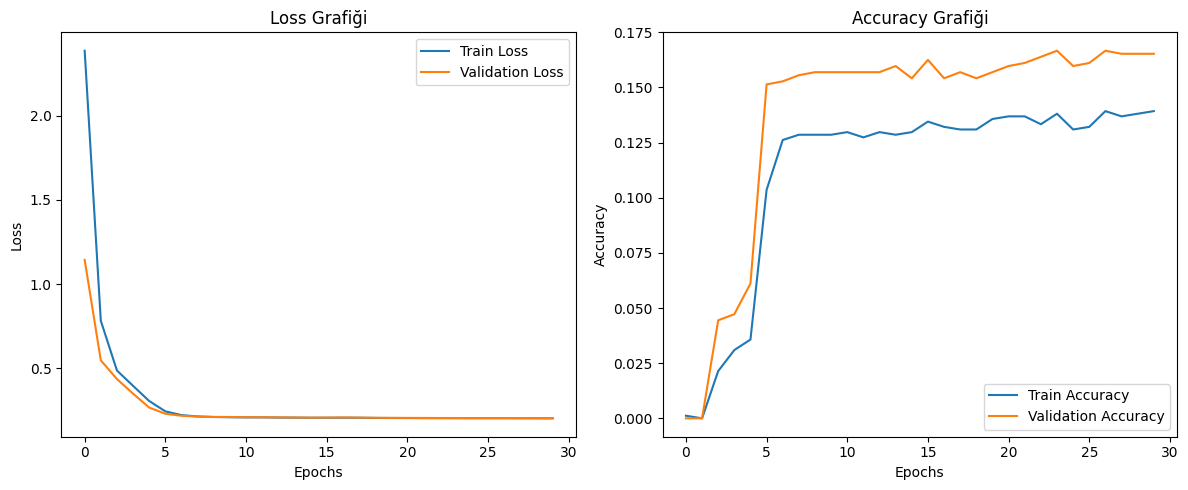

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Define Artificial Neural Network model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(len(mlb.classes_), activation='sigmoid'))

ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

ann_history = ann_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

y_pred_ann = ann_model.predict(X_test)
y_pred_ann_bin = (y_pred_ann > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_ann_bin)
precision = precision_score(y_test, y_pred_ann_bin, average='weighted')
recall = recall_score(y_test, y_pred_ann_bin, average='weighted')
f1 = f1_score(y_test, y_pred_ann_bin, average='weighted')

# Store in a DataFrame
ann_results_df = pd.DataFrame({
    "Model": ["ANN"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-Score": [f1]
})

plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

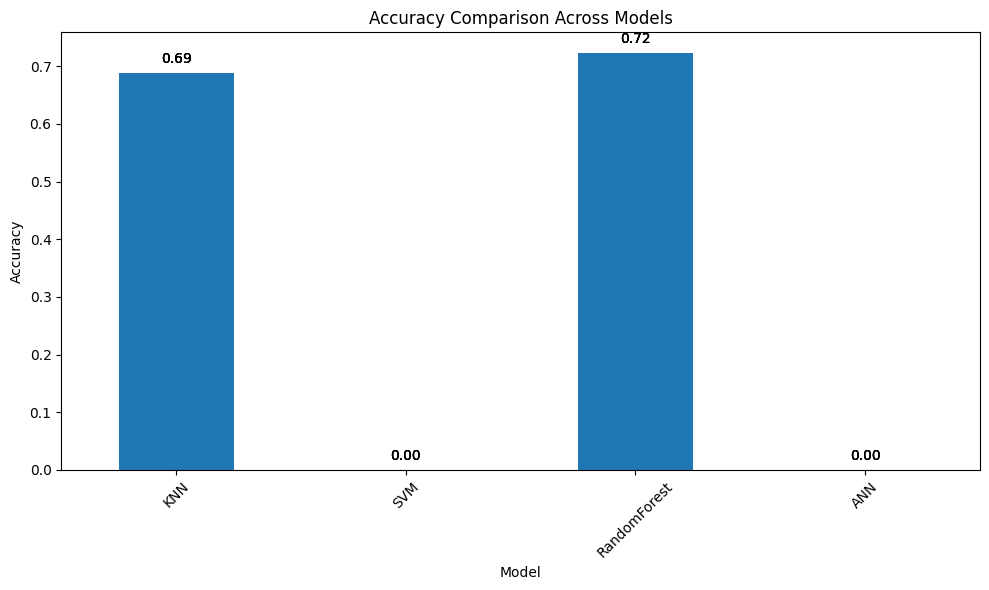

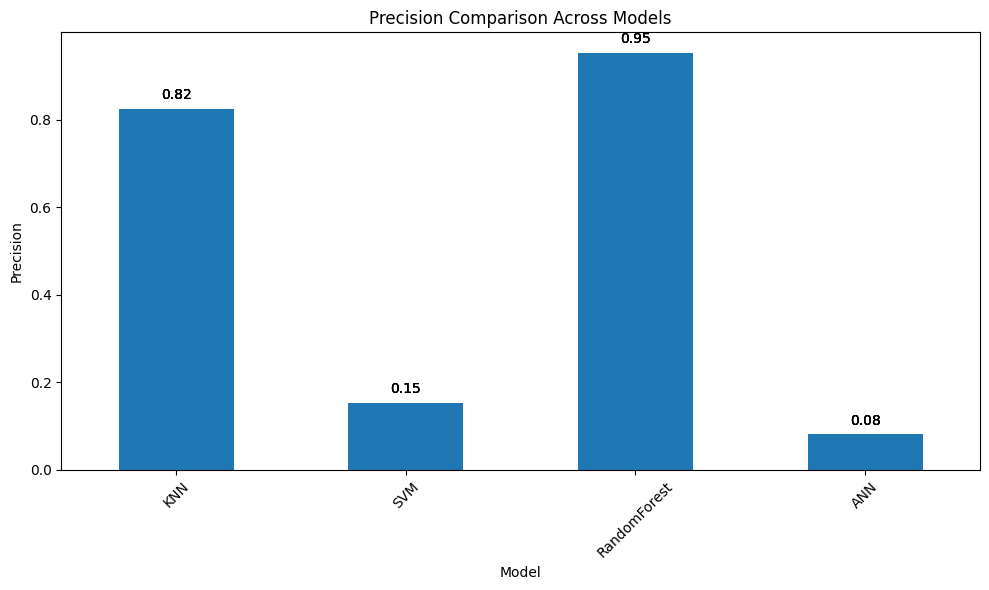

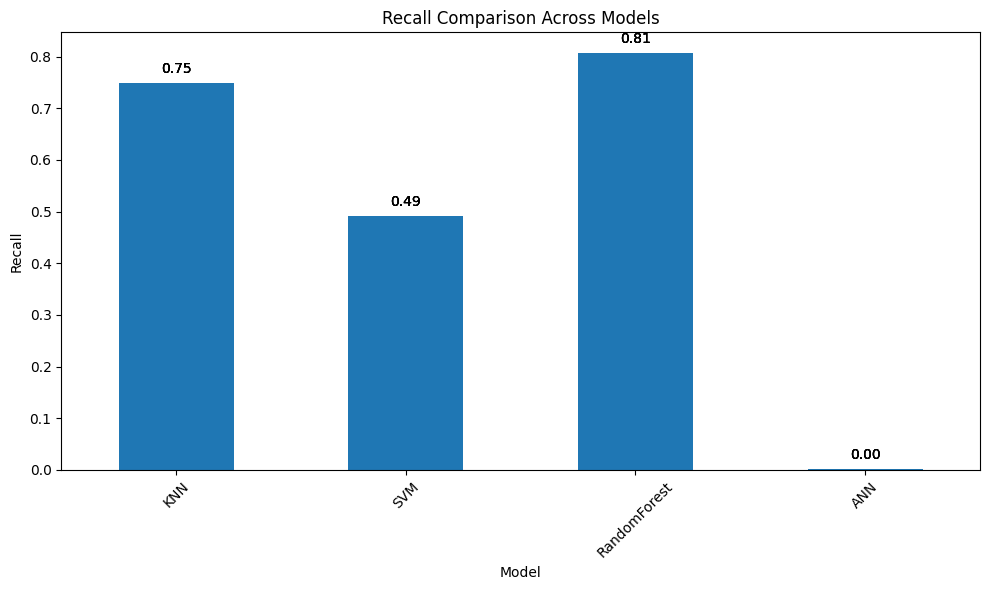

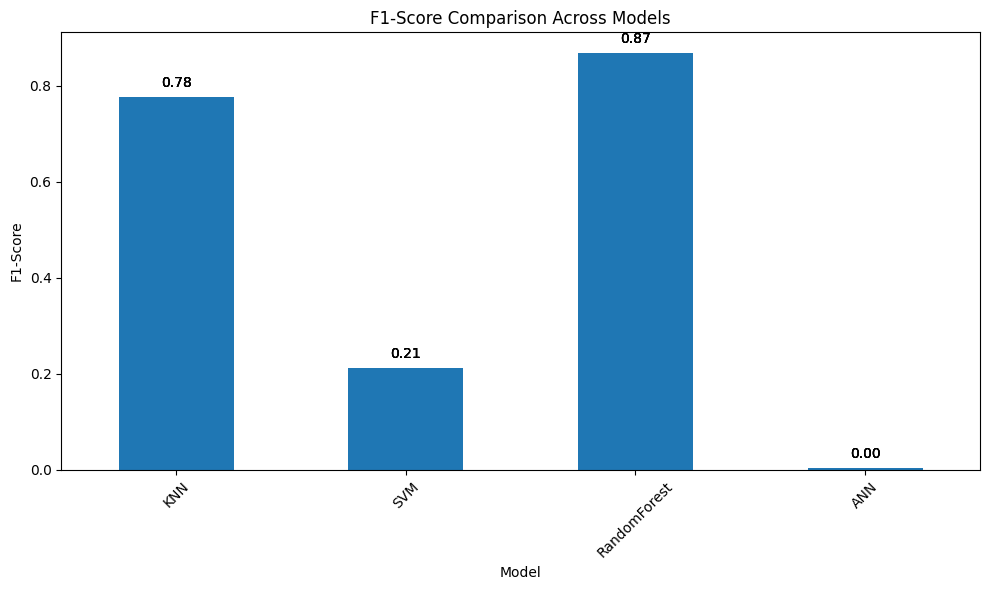

K-fold Cross-Validation Average Results:
          Model  Accuracy  Precision    Recall  F1-Score
0           KNN  0.687917   0.823626  0.749271  0.777296
1           SVM  0.000000   0.151920  0.491510  0.211555
2  RandomForest  0.722500   0.951448  0.806792  0.868188
3           ANN  0.000000   0.080998  0.002038  0.003975


In [58]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

models = {
    "KNN": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5)),
    "SVM": OneVsRestClassifier(SVC(kernel='sigmoid', class_weight='balanced')),
    "RandomForest": OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
}

# K-fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Results list to store summary data
results_list = []

# K-fold cross-validation
for model_name, model in models.items():
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_val_pred = model.predict(X_val)

        # Get classification report
        report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=1)
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = report["weighted avg"]["precision"]
        recall = report["weighted avg"]["recall"]
        f1_score = report["weighted avg"]["f1-score"]

        # Store metrics for the fold
        fold_accuracies.append(accuracy)
        fold_precisions.append(precision)
        fold_recalls.append(recall)
        fold_f1_scores.append(f1_score)

    # After the cross-validation, calculate the average metrics for each model
    results_list.append({
        "Model": model_name,
        "Accuracy": np.mean(fold_accuracies),
        "Precision": np.mean(fold_precisions),
        "Recall": np.mean(fold_recalls),
        "F1-Score": np.mean(fold_f1_scores)
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)
final_results_df = pd.concat([results_df, ann_results_df], ignore_index=True)

# Plotting results for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 6))

    final_results_df.set_index("Model")[metric].plot(kind="bar", ax=ax)
    ax.set_title(f"{metric} Comparison Across Models")
    ax.set_ylabel(metric)

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            # Round the number to 2 decimal places
            ax.bar_label(container, labels=[f"{height:.2f}" for height in container.datavalues], fontsize=10, padding=5)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("K-fold Cross-Validation Average Results:")
print(final_results_df)